# Assignment 1 - Normalizing Continuous Features

Consider data drawn from a 2 dimensional Normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then divide the result by its respective standard deviation. 

(-10.0, 10.0)

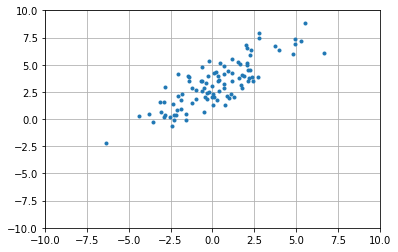

In [262]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

In [263]:
mu = X.mean(axis=0)
mu

array([0.22853705, 3.23017777])

In [264]:
stdev = X.std(axis=0)
stdev

array([2.29235249, 2.13647003])

In [265]:
 Xnormalized = ( X - mu ) / stdev

(-10.0, 10.0)

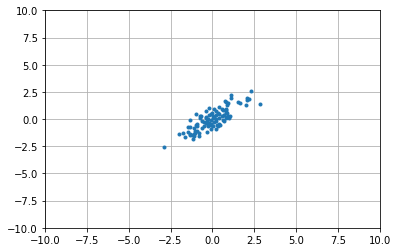

In [266]:
# plot the data
plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

# Assignment 2 - One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns a samples-by-unique-items numpy array in which each row corresponds to the one-hot-encoded version of the respective data point in the original list.

In [267]:
import numpy as np
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

In [268]:
def one_hot_encoding(string_list):
     for p in range(len(string_list)):
          #get unique objects in of string_list -> uniqueElements
          #get indexes of Elements in original, according to where they are in the uniqueElements array -> indexes
          tokens = list(np.unique(data))
          print(tokens)
          occurenceMatrix = np.zeros((len(string_list), len(tokens))) 

          for i in range(len(string_list)):
               occurenceMatrix[i, tokens.index(string_list[i])] = 1
          return occurenceMatrix

In [269]:
one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

['blue', 'green', 'red', 'yellow']


array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [270]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0

# Assignment 3 - Bag-of-Words Features

Consider the following data set

```python
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
```

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [271]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']#

In [272]:
special_char= {
        "," : '',
        ":" : '',
        ";" : '',
        "." : '',
        "?" : ''}

def bag_of_words(corpus):
    string = ''
    compareList = []
    for i in corpus:
        string += i.lower().translate(str.maketrans(special_char)) + ' '
        compareList.append(i.lower().translate(str.maketrans(special_char)).split(' '))
    
    vocabular, indexes = np.unique(string.split(' ')[:-1], return_inverse=True)
    
    bagOfWordsMatrix = np.zeros(len(vocabular)*len(corpus)).reshape(len(corpus), len(vocabular))
    
    for i in range(len(compareList)):
        for j in range(len(vocabular)):
            bagOfWordsMatrix[i][j] = compareList[i].count(vocabular[j])

    return vocabular, bagOfWordsMatrix

In [273]:
X0 = bag_of_words(corpus)[1]

In [274]:
 from sklearn.feature_extraction.text import CountVectorizer 
 
 corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Vocabulary: {}".format(vectorizer.get_feature_names())) 
X.toarray()

Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [275]:
if (X0 == X).all() :
  print('Own implementation is equal to sklean CountVectorizer')

Own implementation is equal to sklean CountVectorizer
